# Assignment: Compresive Strength Concrete Problem
### Abstract:
Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.


Data Set Characteristics:  

Multivariate

Number of Instances:

1030

Area:

Physical

Attribute Characteristics:

Real

Number of Attributes:

9

Date Donated

2007-08-03

Associated Tasks:

Regression

Missing Values?

N/A

Number of Web Hits:

231464

### Description:
Features Name	Data Type	Measurement	Description
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable Water (component 4) | quantitative | kg in a m3 mixture | Input Variable Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable Age | quantitative | Day (1~365) | Input Variable Concrete compressive strength | quantitative | MPa | Output Variable

## WORKFLOW :
1.Load Data
2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
3.Standardized the Input Variables. Hint: Centeralized the data
4.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
5.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
6.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
7.Train the Model with Epochs (100) and validate it
8.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
9.Evaluation Step
10.Prediction
# Load Data:
Click Here to Download DataSet

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD

### Load:

In [2]:
data = pd.read_csv("compresive_strength_concrete.csv")

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### Check Missing Values

In [4]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [5]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

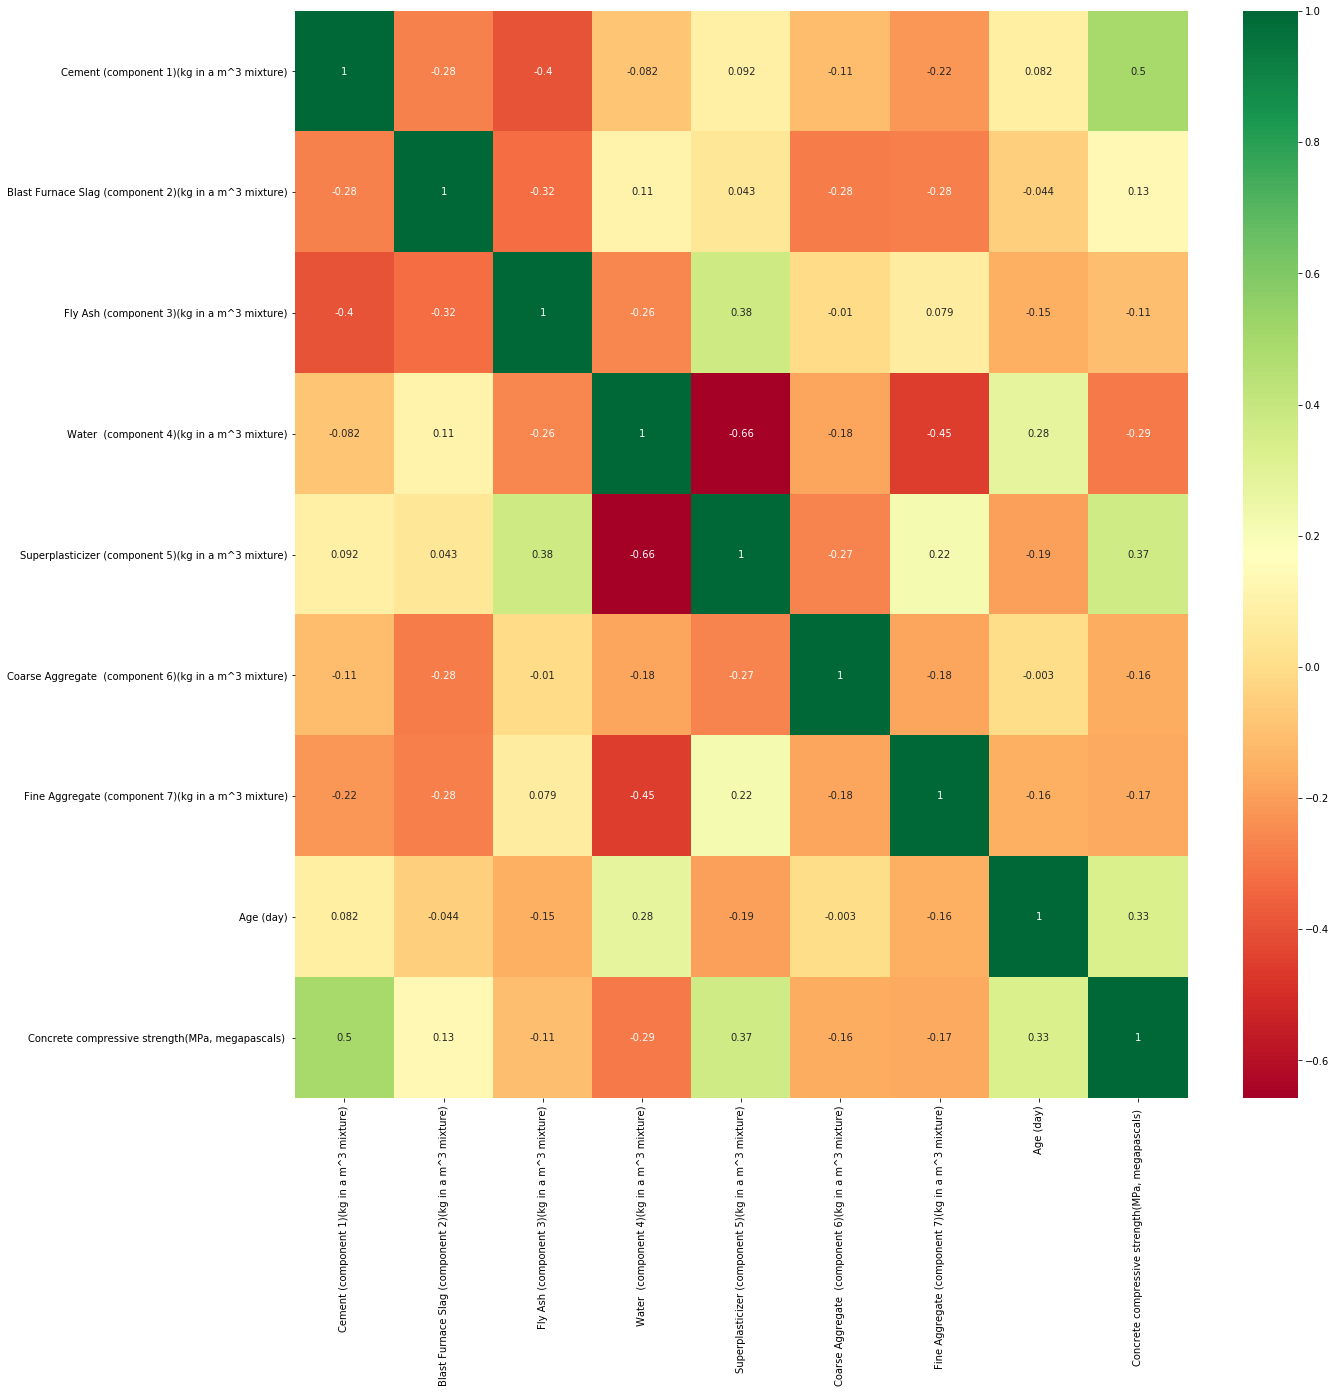

In [7]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (20,20))
g = sns.heatmap(data[top_corr_features].corr(),annot = True,cmap = "RdYlGn")

In [8]:
X = data.iloc[:,:8]

y = data.iloc[:,-1]

#### standardized data

In [9]:
mean = X.mean(axis = 0)
X -= mean
std = X.std(axis = 0)
X /= std
print(mean, "\n")
print(std)

Cement (component 1)(kg in a m^3 mixture)                281.167864
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     73.895825
Fly Ash (component 3)(kg in a m^3 mixture)                54.188350
Water  (component 4)(kg in a m^3 mixture)                181.567282
Superplasticizer (component 5)(kg in a m^3 mixture)        6.204660
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     972.918932
Fine Aggregate (component 7)(kg in a m^3 mixture)        773.580485
Age (day)                                                 45.662136
dtype: float64 

Cement (component 1)(kg in a m^3 mixture)                104.506364
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     86.279342
Fly Ash (component 3)(kg in a m^3 mixture)                63.997004
Water  (component 4)(kg in a m^3 mixture)                 21.354219
Superplasticizer (component 5)(kg in a m^3 mixture)        5.973841
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      77.753954
Fine Aggregate (component 7)(kg

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 32)

In [11]:
print ("X_train:\n\n", X_train, "\n\n\n")
print ("X_test:\n\n", X_test, "\n\n\n")
print ("y_train:\n\n", y_train, "\n\n\n")
print ("y_test:\n\n", y_test)

X_train:

       Cement (component 1)(kg in a m^3 mixture)  \
603                                    0.553384   
1012                                   0.425162   
335                                   -0.058062   
670                                    0.230915   
370                                   -0.595828   
...                                         ...   
510                                    1.366731   
252                                   -0.298239   
88                                     0.779207   
892                                   -0.078157   
727                                    0.476834   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
603                                           -0.856472       
1012                                           1.072147       
335                                           -0.856472       
670                                            1.502146       
370                                           -0.856472      

In [12]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(721, 8) (721,)
(309, 8) (309,)


In [13]:
X_train = np.asarray(X_train).astype("float32")
X_test = np.asarray(X_test).astype("float32")
print (X_train.dtype, X_test.dtype)

float32 float32


In [157]:
val_X = X_train[:230]
partial_X_train = X_train[230:]
val_y = y_train[:230]
partial_y_train = y_train[230:]

In [158]:
print(val_X, partial_X_train)

[[ 0.5533839  -0.85647184 -0.8467326  ... -0.06326279  0.09254037
   2.1266115 ]
 [ 0.42516202  1.0721475  -0.8467326  ... -1.1744603   0.20479344
  -0.27959728]
 [-0.05806215 -0.85647184  1.0502312  ...  1.0376458   0.04888639
  -0.5012218 ]
 ...
 [ 0.8882917   1.3364054  -0.8467326  ... -0.60214216 -0.21054293
   0.71771294]
 [ 1.3763002   0.3755728  -0.8467326  ... -1.5538622   1.4158794
  -0.612034  ]
 [-0.29632515  1.0767835  -0.8467326  ...  0.0602036  -0.9913254
  -0.612034  ]] [[-1.2599028   1.8788295  -0.8467326  ... -1.622026    1.4857258
  -0.27959728]
 [-0.83887583  2.5070217  -0.8467326  ...  0.3251419  -0.8641052
  -0.27959728]
 [-0.790075    0.6780786  -0.8467326  ...  0.07049247  0.6475694
  -0.6753553 ]
 ...
 [ 0.7792074   1.3340873  -0.8467326  ... -0.362926   -0.22176823
  -0.6753553 ]
 [-0.07815662 -0.85647184  0.55958325 ... -0.5391228  -0.14443834
  -0.27959728]
 [ 0.4768335  -0.85647184 -0.8467326  ...  0.6698189   0.5914429
  -0.612034  ]]


In [159]:
print(val_y, partial_y_train)

603     36.45
1012    61.24
335     38.77
670     43.38
370     26.05
        ...  
201     26.40
885     26.23
162     64.90
103     49.20
664     19.35
Name: Concrete compressive strength(MPa, megapascals) , Length: 230, dtype: float64 946    32.96
556    32.63
57      9.13
518    23.25
630    17.34
       ...  
510    39.00
252    38.33
88     35.30
892    32.24
727    17.44
Name: Concrete compressive strength(MPa, megapascals) , Length: 491, dtype: float64


### Model

In [160]:
from keras import models, layers , optimizers
model = models.Sequential()
model.add(tf.keras.layers.Dense(10,activation = "relu",input_shape = (X_train.shape[1],)))
model.add(tf.keras.layers.Dense(8,activation = "relu"))
model.add(tf.keras.layers.Dense(1))
#Compile:
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss="mse",metrics=['mae'])

In [161]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                90        
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 88        
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 9         
Total params: 187
Trainable params: 187
Non-trainable params: 0
_________________________________________________________________


In [162]:
network = model.fit(partial_X_train,partial_y_train,epochs = 10,validation_data=(val_X,val_y),batch_size=1,verbose=1) 

Epoch 1/10
491/491 [==============================] - 2s 2ms/step - loss: 1602.4326 - mae: 36.2543 - val_loss: 1270.9196 - val_mae: 30.9403
Epoch 2/10
491/491 [==============================] - 1s 2ms/step - loss: 1279.9145 - mae: 31.2873 - val_loss: 751.3546 - val_mae: 21.9298
Epoch 3/10
491/491 [==============================] - 1s 2ms/step - loss: 668.4984 - mae: 20.8916 - val_loss: 345.1571 - val_mae: 14.8612
Epoch 4/10
491/491 [==============================] - 1s 2ms/step - loss: 270.1720 - mae: 13.5666 - val_loss: 211.0888 - val_mae: 11.8209
Epoch 5/10
491/491 [==============================] - 1s 2ms/step - loss: 200.4582 - mae: 11.7838 - val_loss: 172.1022 - val_mae: 10.6402
Epoch 6/10
491/491 [==============================] - 1s 2ms/step - loss: 153.5917 - mae: 10.0391 - val_loss: 157.4083 - val_mae: 10.0501
Epoch 7/10
491/491 [==============================] - 1s 2ms/step - loss: 152.1502 - mae: 10.0989 - val_loss: 148.1264 - val_mae: 9.7066
Epoch 8/10
491/491 [============

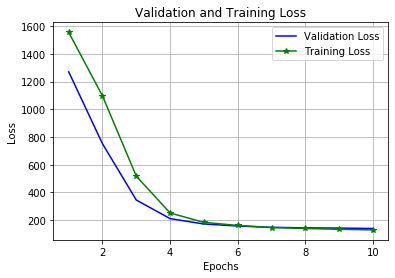

In [163]:
loss = network.history['loss']
val_loss = network.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, val_loss , label='Validation Loss',color="blue" )
plt.plot(epochs, loss,label='Training Loss', color= "green", marker= "*")
plt.title('Validation and Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [164]:
all_mae_histories=[]
mae_history = network.history['val_mae']
all_mae_histories.append(mae_history)
print(all_mae_histories)

[[30.940290451049805, 21.929840087890625, 14.861176490783691, 11.820883750915527, 10.640233039855957, 10.050121307373047, 9.706586837768555, 9.517228126525879, 9.36157512664795, 9.231048583984375]]


In [165]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(2)]
print(average_mae_history)

[30.940290451049805, 21.929840087890625]


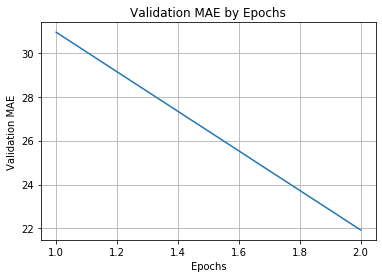

In [166]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.title('Validation MAE by Epochs')
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.grid()
plt.show()

In [167]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 114.6473 - mae: 8.4752


In [168]:
test_mae_score

8.475236892700195

In [169]:
y_pred = model.predict(X_test)
y_pred

array([[22.583782 ],
       [21.086784 ],
       [12.873023 ],
       [36.662346 ],
       [25.937298 ],
       [35.142475 ],
       [63.892757 ],
       [44.40825  ],
       [38.29389  ],
       [33.715824 ],
       [59.82367  ],
       [42.391277 ],
       [16.884218 ],
       [74.09727  ],
       [44.002487 ],
       [19.414    ],
       [18.434967 ],
       [37.454487 ],
       [21.866772 ],
       [15.297411 ],
       [18.585459 ],
       [55.28043  ],
       [28.941402 ],
       [21.797161 ],
       [33.670918 ],
       [44.873646 ],
       [53.833546 ],
       [53.47404  ],
       [31.820536 ],
       [19.863468 ],
       [41.084972 ],
       [18.776478 ],
       [43.457283 ],
       [66.25344  ],
       [38.008038 ],
       [26.903835 ],
       [19.614044 ],
       [29.50628  ],
       [32.73376  ],
       [23.969128 ],
       [29.82053  ],
       [50.827446 ],
       [41.9067   ],
       [61.901615 ],
       [25.556463 ],
       [31.570364 ],
       [29.057201 ],
       [34.80

In [170]:
y_test

875    18.28
660    31.02
606    12.84
233    53.90
692    39.70
       ...  
313    52.04
834    33.69
419    16.88
571    39.70
186    24.89
Name: Concrete compressive strength(MPa, megapascals) , Length: 309, dtype: float64

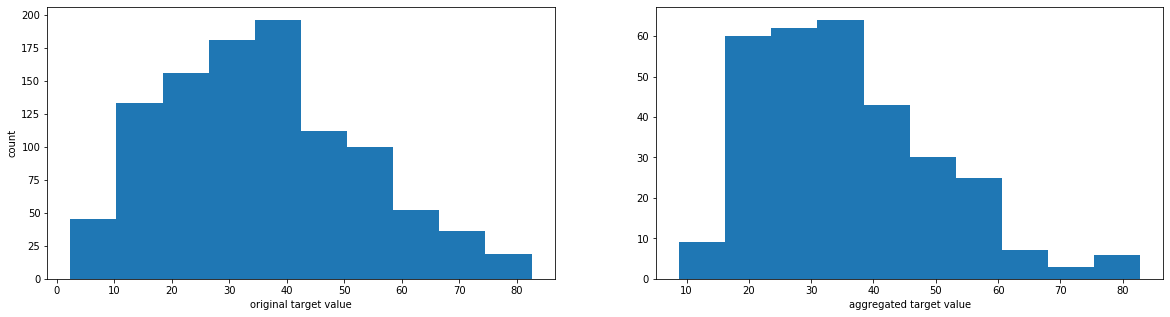

In [171]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1 )
plt.hist(y)
plt.xlabel('original target value')
plt.ylabel('count')
plt.subplot(1, 2, 2)
plt.hist(y_pred)
plt.xlabel('aggregated target value')
plt.show()